In [226]:
import numpy as np
import random
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#### Определение среды и возможных действий

In [77]:
grid_size = 5
start = (0, 0)
treasure = (3, 4)
holes = [(2, 2), (0, 3), (4, 3)]

actions = ['up', 'down', 'left', 'right']

#### Q-Learning

In [80]:
Q = {}
for i in range(grid_size):
    for j in range(grid_size):
        Q[(i, j)] = {a: 0 for a in actions}

In [82]:
def choose_action(state, epsilon):
    if random.random() < epsilon:
        return random.choice(actions)  
    else:
        return max(Q[state].items(), key=lambda x: x[1])[0]  

def get_next_state(state, action):
    i, j = state
    if action == 'up' and i > 0:
        return (i - 1, j)
    elif action == 'down' and i < grid_size - 1:
        return (i + 1, j)
    elif action == 'left' and j > 0:
        return (i, j - 1)
    elif action == 'right' and j < grid_size - 1:
        return (i, j + 1)
    return state  # Если действие невозможно, остаемся на месте

def get_reward(state):
    if state == treasure:
        return 100
    elif state in holes:
        return -50
    else:
        return -1

#### Обучение

In [85]:
alpha = 0.1  # Скорость обучения
gamma = 0.9  # Коэффициент дисконтирования
epsilon = 0.1  # Вероятность случайного действия
episodes = 1000  # Число эпизодов

rewards_per_episode = []

for episode in range(episodes):
    state = start
    total_reward = 0
    done = False
    
    while not done:
        action = choose_action(state, epsilon)
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)
        
        # Обновляем Q-значение
        best_next_action = max(Q[next_state].items(), key=lambda x: x[1])[0]
        td_target = reward + gamma * Q[next_state][best_next_action]
        td_error = td_target - Q[state][action]
        Q[state][action] += alpha * td_error
        
        state = next_state
        total_reward += reward
        
        if state == treasure or state in holes:
            done = True
    
    rewards_per_episode.append(total_reward)

#### Визуализация

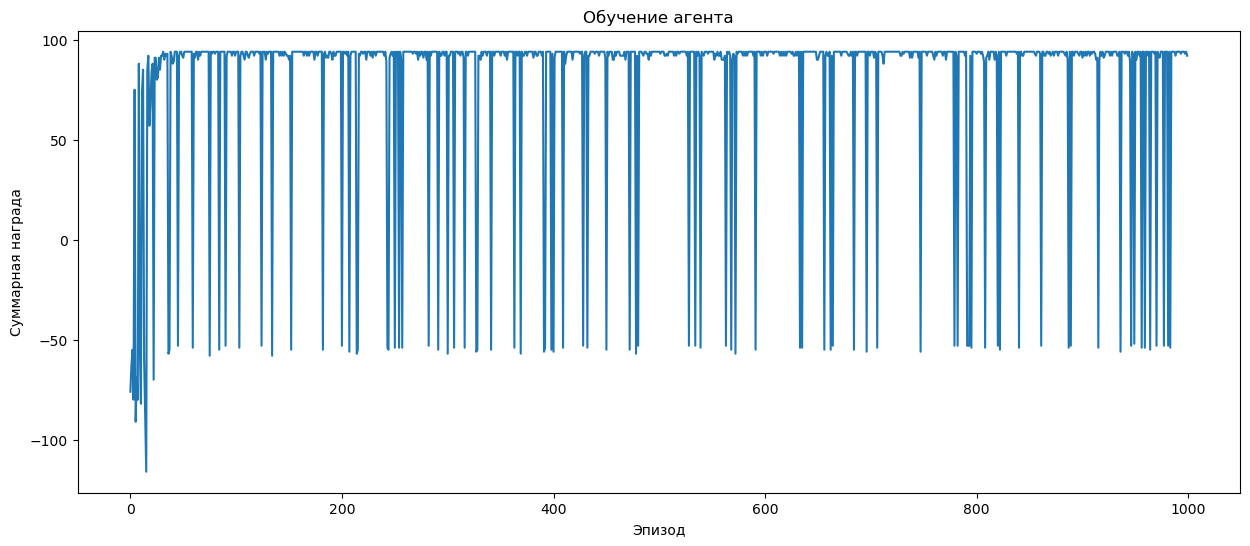

In [107]:
plt.subplots(figsize=(15, 6))

plt.plot(rewards_per_episode)
plt.xlabel('Эпизод')
plt.ylabel('Суммарная награда')
plt.title('Обучение агента')
plt.show()

In [90]:
def visualize_policy():
    policy = np.empty((grid_size, grid_size), dtype=str)
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == treasure:
                policy[i, j] = 'G'
            elif (i, j) in holes:
                policy[i, j] = 'H'
            else:
                best_action = max(Q[(i, j)].items(), key=lambda x: x[1])[0]
                policy[i, j] = best_action[0].upper()  # Первая буква действия
    print(policy)

visualize_policy()

[['R' 'D' 'D' 'H' 'R']
 ['R' 'R' 'R' 'D' 'D']
 ['R' 'U' 'H' 'R' 'D']
 ['R' 'R' 'R' 'R' 'G']
 ['U' 'U' 'U' 'H' 'U']]


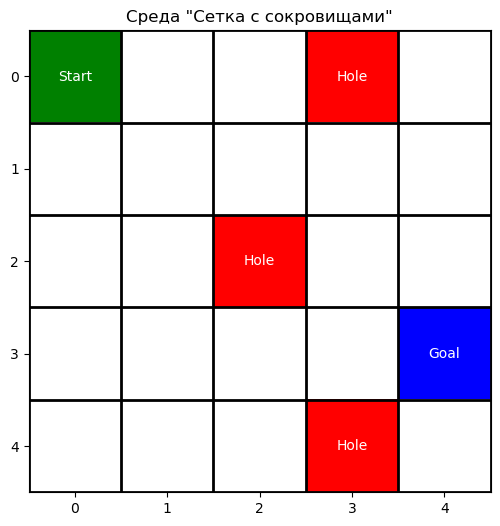

In [214]:
def plot_grid():
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Цветовая карта
    cmap = mcolors.ListedColormap(['white', 'black', 'red', 'green', 'blue'])
    bounds = [0, 1, 2, 3, 4, 5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    # Заполнение матрицы значений
    grid_matrix = np.zeros((grid_size, grid_size))
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == start:
                grid_matrix[i, j] = 3  # Старт (зеленый)
            elif (i, j) == treasure:
                grid_matrix[i, j] = 4  # Сокровище (синий)
            elif (i, j) in holes:
                grid_matrix[i, j] = 2  # Ямы (красный)
            else:
                grid_matrix[i, j] = 0  # Пустые клетки (белый)
    
    # Сетка
    ax.imshow(grid_matrix, cmap=cmap, norm=norm)
    
    # Подписи
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == start:
                ax.text(j, i, 'Start', ha='center', va='center', color='white')
            elif (i, j) == treasure:
                ax.text(j, i, 'Goal', ha='center', va='center', color='white')
            elif (i, j) in holes:
                ax.text(j, i, 'Hole', ha='center', va='center', color='white')
    
    # Настройки отображения
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', size=0)
    plt.title('Среда "Сетка с сокровищами"')
    plt.show()

plot_grid()

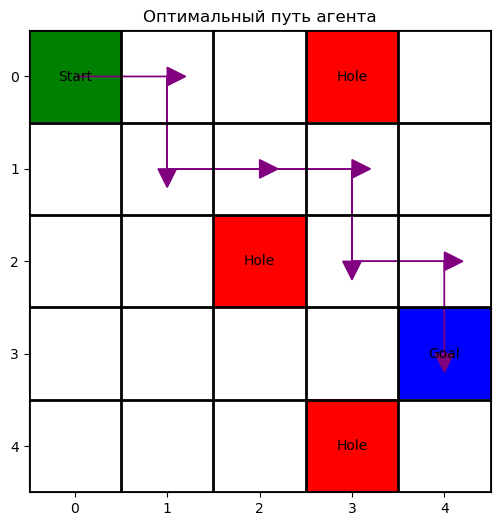

In [216]:
def plot_agent_path():
    # Восстанавление оптимального пути
    state = start
    path = [state]
    visited = set()

    cmap = mcolors.ListedColormap(['white', 'black', 'red', 'green', 'blue'])
    bounds = [0, 1, 2, 3, 4, 5]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    while state != treasure:
        action = max(Q[state].items(), key=lambda x: x[1])[0]
        next_state = get_next_state(state, action)
        
        # Защита от зацикливания
        if next_state in visited:
            break
        visited.add(next_state)
        
        path.append(next_state)
        state = next_state
    
    # Сетка и путь
    fig, ax = plt.subplots(figsize=(6, 6))
    grid_matrix = np.zeros((grid_size, grid_size))
    
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == start:
                grid_matrix[i, j] = 3
            elif (i, j) == treasure:
                grid_matrix[i, j] = 4
            elif (i, j) in holes:
                grid_matrix[i, j] = 2
            else:
                grid_matrix[i, j] = 0
    
    ax.imshow(grid_matrix, cmap = cmap, norm=norm)
    
    # Стрелки
    for k in range(len(path) - 1):
        i, j = path[k]
        next_i, next_j = path[k + 1]
        dx, dy = next_j - j, next_i - i
        ax.arrow(j, i, dx, dy, head_width=0.2, head_length=0.2, fc='purple', ec='purple')
    
    # Подписи
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == start:
                ax.text(j, i, 'Start', ha='center', va='center', color='black')
            elif (i, j) == treasure:
                ax.text(j, i, 'Goal', ha='center', va='center', color='black')
            elif (i, j) in holes:
                ax.text(j, i, 'Hole', ha='center', va='center', color='black')
    
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', size=0)
    plt.title('Оптимальный путь агента')
    plt.show()

plot_agent_path()

In [218]:
def test_hyperparameters(alphas=[0.1, 0.5], gammas=[0.5, 0.9], epsilons=[0.1, 0.3], episodes=1000):
    plt.figure(figsize=(15, 10))
    results = []
    line_styles = ['-', '--', ':', '-.']
    color_palette = sns.color_palette("husl", len(alphas)*len(gammas)*len(epsilons))
    
    # Subplot для кривых обучения
    ax1 = plt.subplot(2, 1, 1)
    
    # Счетчик для стилей линий
    style_counter = 0
    
    for alpha in alphas:
        for gamma in gammas:
            for epsilon in epsilons:
                # Инициализация Q-таблицы
                Q = {}
                for i in range(grid_size):
                    for j in range(grid_size):
                        Q[(i, j)] = {a: 0 for a in actions}
                
                rewards = []
                
                # Обучение
                for episode in range(episodes):
                    state = start
                    total_reward = 0
                    done = False
                    
                    while not done:
                        action = choose_action(state, epsilon)
                        next_state = get_next_state(state, action)
                        reward = get_reward(next_state)
                        
                        best_next_action = max(Q[next_state].items(), key=lambda x: x[1])[0]
                        td_target = reward + gamma * Q[next_state][best_next_action]
                        td_error = td_target - Q[state][action]
                        Q[state][action] += alpha * td_error
                        
                        state = next_state
                        total_reward += reward
                        
                        if state == treasure or state in holes:
                            done = True
                    
                    rewards.append(total_reward)
                
                # Сглаживание наград для лучшей визуализации
                window_size = max(1, episodes//20)
                smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
                
                # Построение кривой обучения
                label = f"α={alpha}, γ={gamma}, ε={epsilon}"
                ax1.plot(range(len(smoothed_rewards)), smoothed_rewards, 
                        label=label,
                        linestyle=line_styles[style_counter % len(line_styles)],
                        color=color_palette[style_counter])
                style_counter += 1
                
                # Сохранение результатов
                avg_reward = np.mean(rewards[-100:])
                results.append({
                    'alpha': alpha,
                    'gamma': gamma,
                    'epsilon': epsilon,
                    'avg_reward': avg_reward
                })
    
    ax1.set_xlabel('Эпизод')
    ax1.set_ylabel('Сглаженная награда')
    ax1.set_title('Кривые обучения для разных комбинаций гиперпараметров')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True)
    
    plt.tight_layout()
    plt.show()

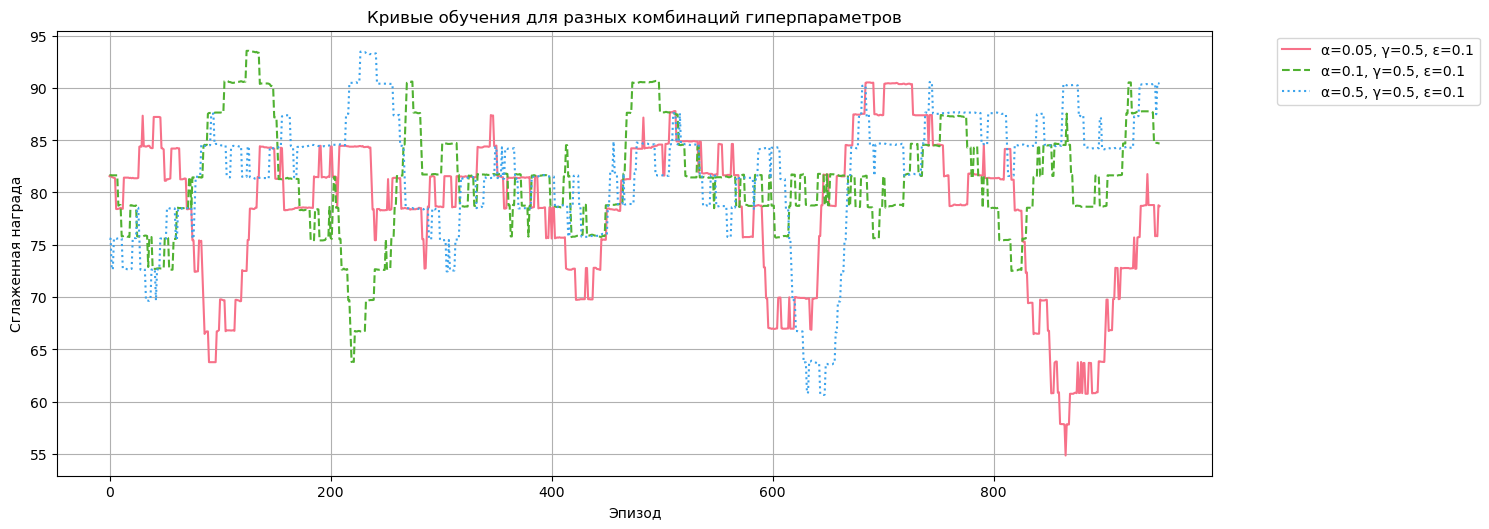

In [220]:
test_hyperparameters(
    alphas = [0.05, 0.1, 0.5],
    gammas = [0.5],
    epsilons = [0.1],
    episodes = 1000
)

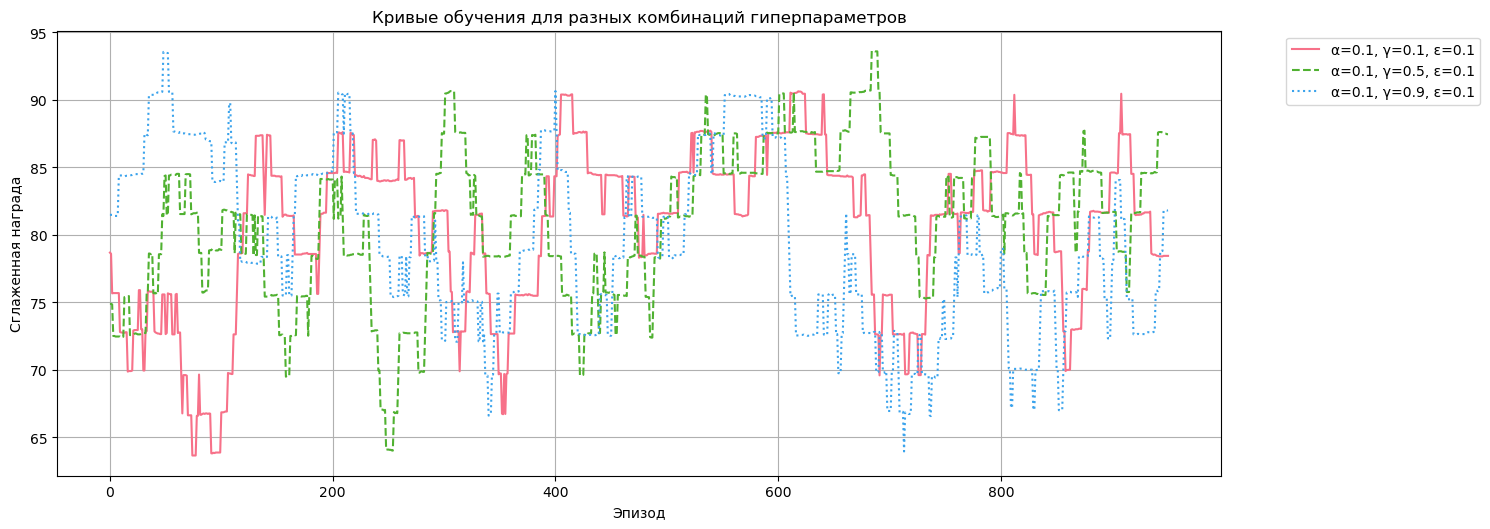

In [222]:
test_hyperparameters(
    alphas = [0.1],
    gammas = [0.1, 0.5, 0.9],
    epsilons = [0.1],
    episodes = 1000
)

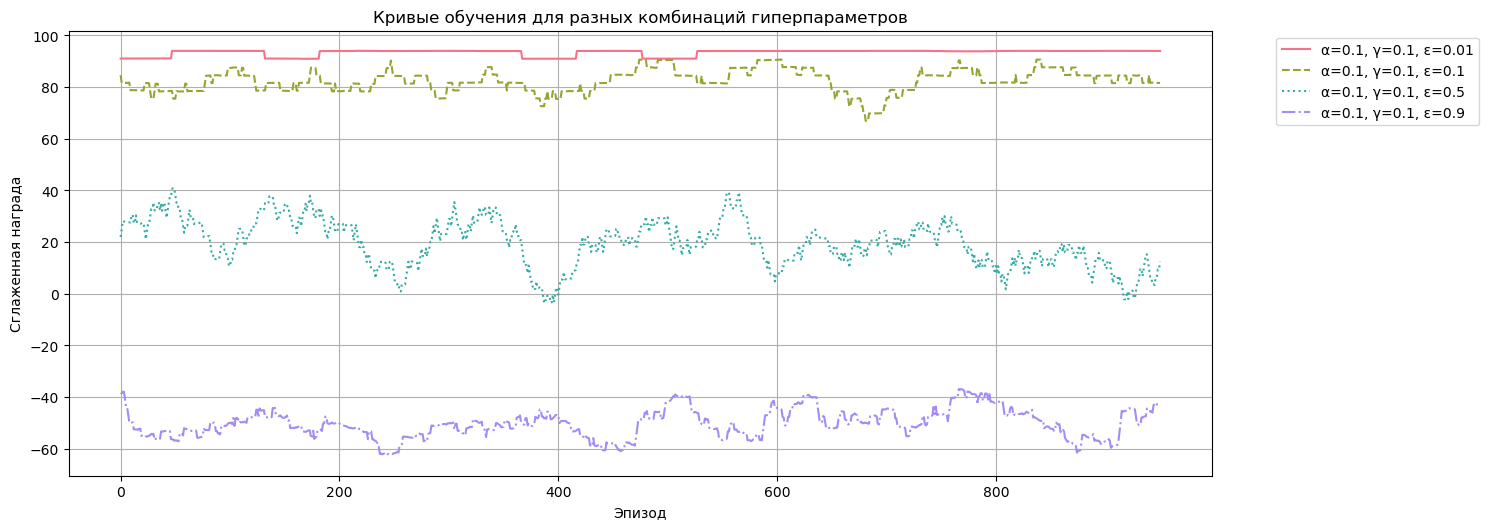

In [224]:
test_hyperparameters(
    alphas = [0.1],
    gammas = [0.1],
    epsilons = [0.01, 0.1, 0.5, 0.9],
    episodes = 1000
)